Model executed 1 scenarios in 0.5 seconds, running at 1038.0 timesteps per second.


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


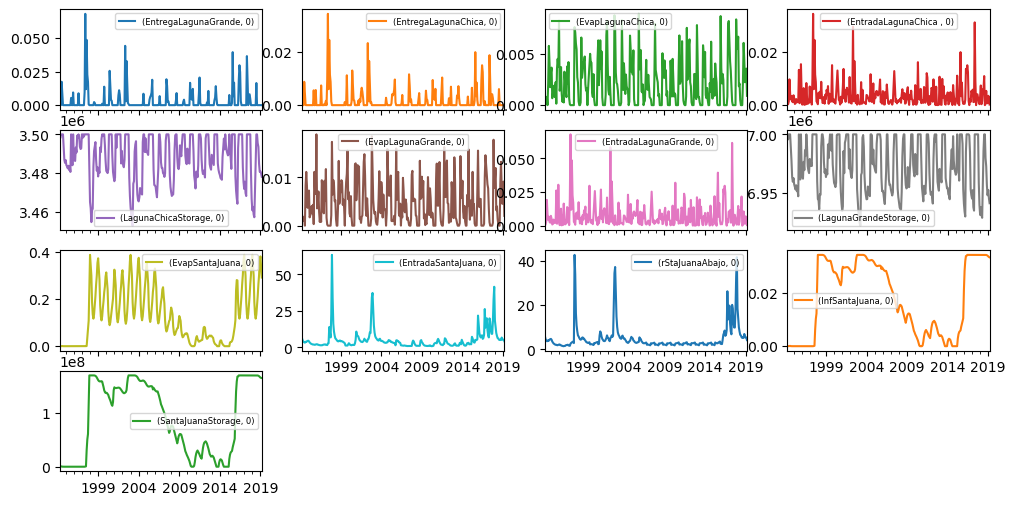

In [45]:
from pywr.core import Model
from pywr.recorders import Recorder
from pywr.recorders._recorders import NodeRecorder
from pywr.notebook import draw_graph
from pywr.notebook import pywr_model_to_d3_json
import matplotlib.pyplot as plt

if __name__ == "__main__":

    modelo="huasco.json"
    m = Model.load(modelo)
    m.solver.name="glpk-edge"
    stats = m.run()
    print(stats)

    df = m.to_dataframe()
    colsQ=[x for x in df.columns if 'Storage' not in x[0]]
#     pasar a m3/s
    df[colsQ]=df[colsQ]/86400.
    axis=df.plot(subplots=True, figsize = (12,6),layout=(4,4))
    for i,a in enumerate(axis.reshape(-1)):
        a.legend(loc='best', prop={'size': 6})
#     plt.show()
    plt.savefig('resHuascoSup.svg',bbox_inches='tight')
    df.to_csv(r'resultadosModelo.csv')
    
#     plt.figure()
#     draw_graph(m,labels = True, attributes = True,width=900,height=900)
#     plt.show()


In [44]:
# from pywr.notebook import to_html
# to_html(m,height=800,width=800,labels=True,attributes=True,title='Modelo Cuenca del Río Huasco')

In [ ]:
from pywr.notebook import pywr_model_to_d3_json
d3json=pywr_model_to_d3_json(m)
import json
with open("./d3.json", "w") as fp:
    json.dump(d3json,fp) 